mean squared error=  10.85592128879332
r2 score=  0.2319868674542106


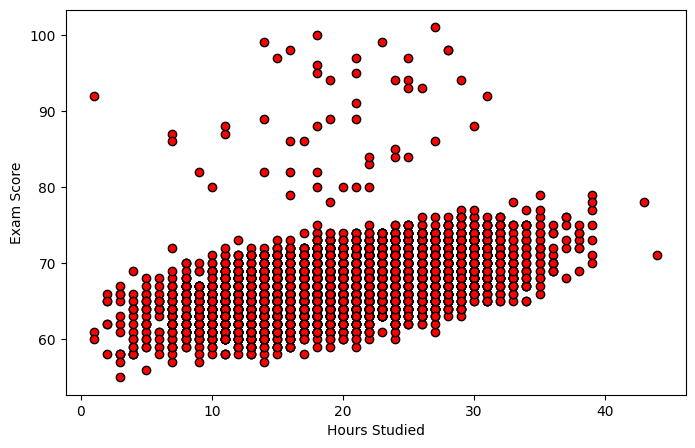

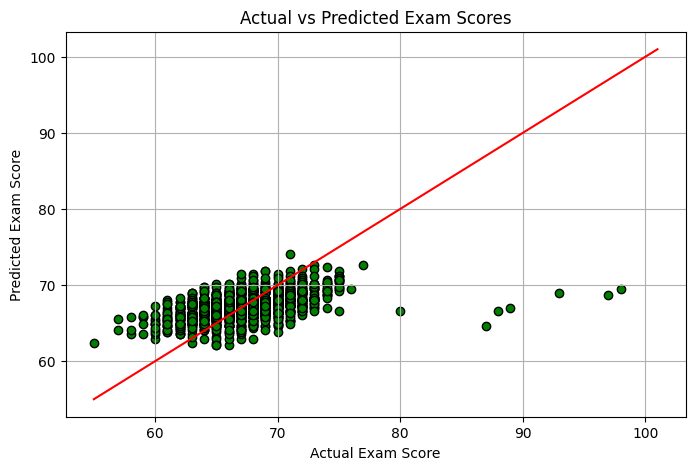

In [44]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df_clean = df.drop(columns=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])
x = df_clean[['Hours_Studied']]
y = df_clean['Exam_Score']
x_train ,x_test ,y_train,y_test = train_test_split (x,y , test_size = 0.2 , random_state=42)
model=LinearRegression()
model.fit(x_train,y_train )
y_predict = model.predict(x_test)
print("mean squared error= ", mean_squared_error(y_test, y_predict))
print("r2 score= ", r2_score(y_test, y_predict))
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['Hours_Studied'], df_clean['Exam_Score'], color='red', edgecolor='black')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, color='green', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r') 
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()



🔹 Linear Regression:
MSE: 10.85592128879332
R² Score: 0.2319868674542106

🔸 Polynomial Regression (degree=2):
MSE: 10.844988135705009
R² Score: 0.23276034442853477


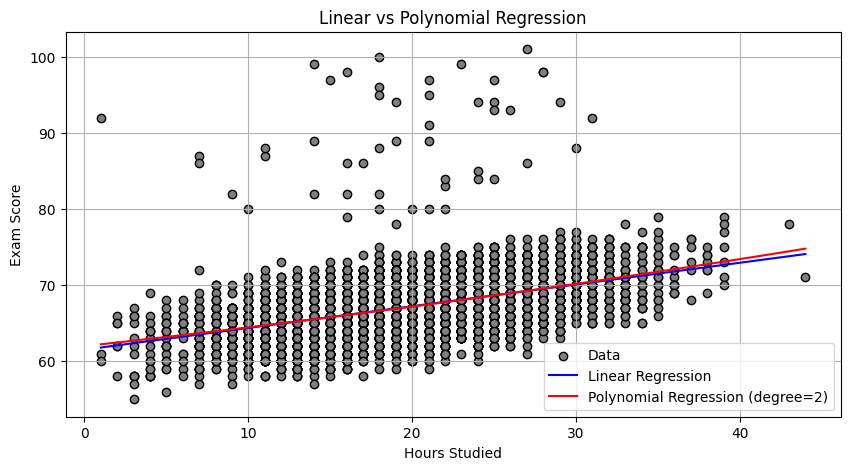

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and clean the dataset
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df_clean = df.drop(columns=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'])

# Features and labels
x = df_clean[['Hours_Studied']]
y = df_clean['Exam_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

# Polynomial Regression Model (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_pred_poly = poly_model.predict(x_poly_test)

# Performance Metrics
print("🔹 Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))

print("\n🔸 Polynomial Regression (degree=2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))

# Visualization: Predictions
plt.figure(figsize=(10, 5))

# Scatter original data
plt.scatter(x, y, color='gray', label='Data', edgecolor='black')

# Sort x for smoother curve
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_df = pd.DataFrame(x_range, columns=["Hours_Studied"])  

# Predictions for plotting
y_linear_plot = linear_model.predict(x_range_df)
y_poly_plot = poly_model.predict(poly.transform(x_range_df))

# Plot linear regression
plt.plot(x_range, y_linear_plot, color='blue', label='Linear Regression')

# Plot polynomial regression
plt.plot(x_range, y_poly_plot, color='red', label='Polynomial Regression')

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()
